### Import libraires

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff


### Import dataset

In [2]:
us_videos=pd.read_csv('USvideos.csv')
us_videos_categories=pd.read_json('US_category_id.json')

In [3]:
us_videos.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
us_videos_categories.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [5]:
us_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


### Transfer date time format

In [6]:
# Transforming Trending date column to datetime format
us_videos['trending_date'] = pd.to_datetime(us_videos['trending_date'],errors='ignore', format='%y.%d.%m').dt.date

# Transforming Trending date column to datetime format and splitting into two separate ones
publish_time = pd.to_datetime(us_videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
us_videos['publish_date'] = publish_time.dt.date
us_videos['publish_time'] = publish_time.dt.time
us_videos['publish_hour'] = publish_time.dt.hour

In [7]:
us_videos.head(2)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,publish_hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,7


### New feature 'Category'

In [8]:
items=us_videos_categories['items']
items[0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [9]:
categories={category['id']: category['snippet']['title'] for category in us_videos_categories['items']}
us_videos.insert(4, 'category', us_videos['category_id'].astype(str).map(categories))

In [10]:
us_videos.head(2)

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,publish_hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,7


In [11]:
us_videos['category'].unique()

array(['People & Blogs', 'Entertainment', 'Comedy',
       'Science & Technology', 'Film & Animation', 'News & Politics',
       'Sports', 'Music', 'Pets & Animals', 'Education', 'Howto & Style',
       'Autos & Vehicles', 'Travel & Events', 'Gaming',
       'Nonprofits & Activism', 'Shows'], dtype=object)

### Dislike percentage

In [12]:
us_videos_copy=us_videos.copy()
us_videos_copy['dislike_percentage']=us_videos['dislikes']/(us_videos['dislikes']+us_videos['likes'])
us_videos_copy['dislike_percentage'].head()

0    0.049030
1    0.059479
2    0.035271
3    0.061450
4    0.014819
Name: dislike_percentage, dtype: float64

### Distibution of features

In [13]:
from scipy.stats import norm
us_videos_copy['likes_log']=np.log(us_videos['likes']+1)
us_videos_copy['dislikes_log']=np.log(us_videos['dislikes']+1)
us_videos_copy['views_log']=np.log(us_videos['views']+1)
us_videos_copy['comment_count_log']=np.log(us_videos['comment_count']+1)

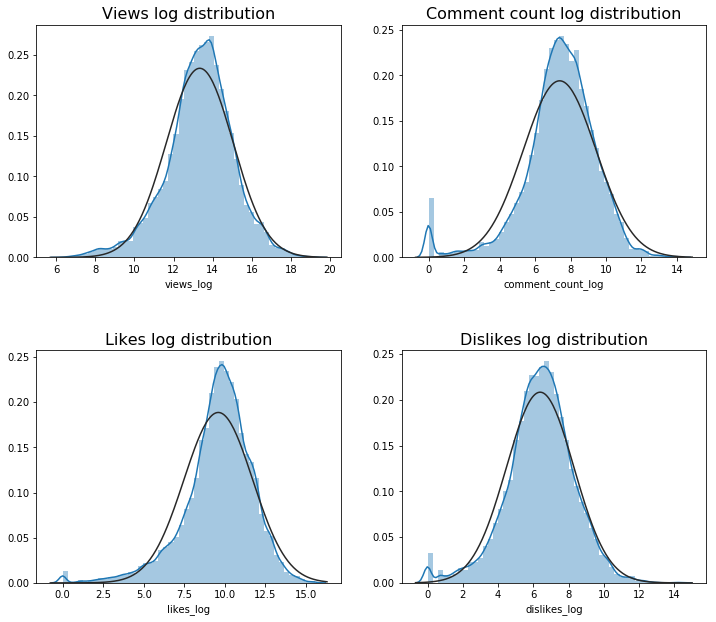

In [14]:
plt.figure(figsize=(12,10))
plt.subplot(221)
g1=sns.distplot(us_videos_copy['views_log'],fit=norm)
g1.set_title('Views log distribution',fontsize=16)

plt.subplot(222)
g2=sns.distplot(us_videos_copy['comment_count_log'],fit=norm)
g2.set_title('Comment count log distribution', fontsize=16)

plt.subplot(223)
g3=sns.distplot(us_videos_copy['likes_log'], fit=norm)
g3.set_title('Likes log distribution', fontsize=16)

plt.subplot(224)
g4=sns.distplot(us_videos_copy['dislikes_log'], fit=norm)
g4.set_title('Dislikes log distribution',fontsize=16)

plt.subplots_adjust(wspace=0.2, hspace=0.4, top=0.9)

### How many videos retrending

In [15]:
us_videos_drop_duplicates=us_videos.drop_duplicates(subset=['video_id'], keep='first', inplace=False)
print('us_videos dataset contains %d videos' %us_videos.shape[0])
print('us_videos_drop_duplicates contains %d videos' %us_videos_drop_duplicates.shape[0])

us_videos dataset contains 40949 videos
us_videos_drop_duplicates contains 6351 videos


### Add new feature 'Days before trending'

In [16]:
us_videos['days_before_trending']=(us_videos.trending_date-us_videos.publish_date)/np.timedelta64(1,'D')
us_videos['dyas_before_trending']=us_videos['days_before_trending'].astype(int)
us_videos.head(3)

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,publish_hour,days_before_trending,dyas_before_trending
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,17:13:01,SHANtell martin,748374,57527,...,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17,1.0,1
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,...,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,7,1.0,1
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,...,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,19,2.0,2


### missing value

In [17]:
us_videos.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category                    0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
publish_date                0
publish_hour                0
days_before_trending        0
dyas_before_trending        0
dtype: int64

### Add new feature 'views per day'

In [18]:
us_videos.loc[(us_videos['days_before_trending']<1), 'days_before_trending']=1
us_videos['views_per_day']=us_videos['views'].astype(int)/us_videos['days_before_trending']
us_videos.head(3)


,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,publish_hour,days_before_trending,dyas_before_trending,views_per_day
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,17:13:01,SHANtell martin,748374,57527,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17,1.0,1,748374.0
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,...,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,7,1.0,1,2418783.0
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,19,2.0,2,1595717.0


### Save preprocessing data into new csv file

In [19]:
us_videos.to_csv('preprocessedUS_videos.csv', index=False)

### Data Visualization 

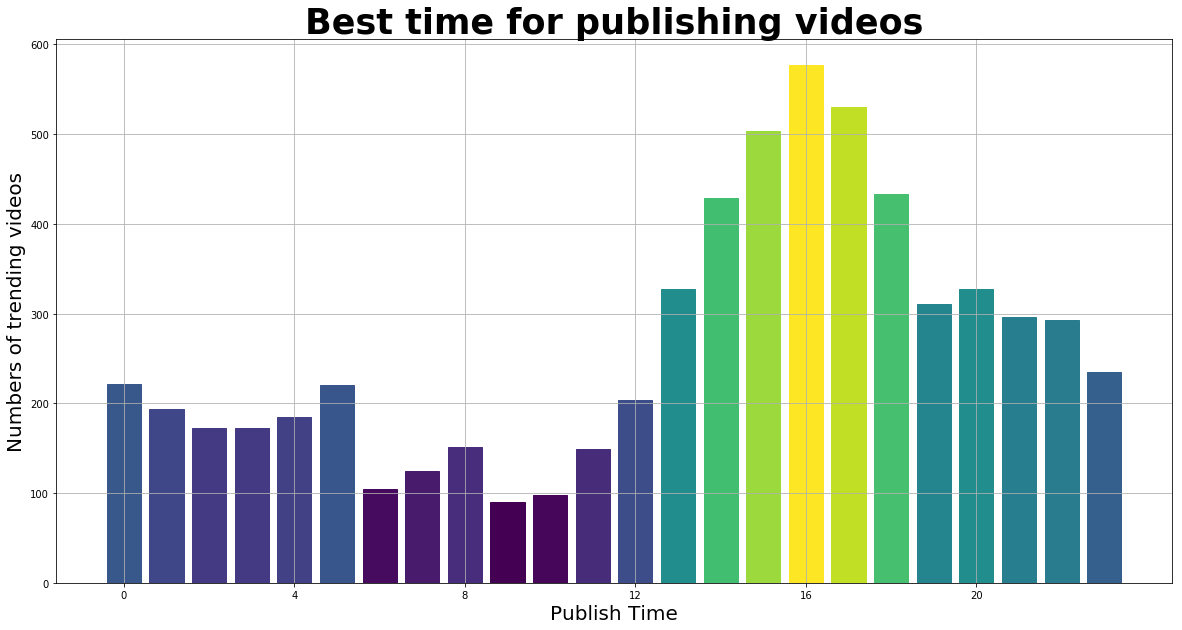

In [20]:
publishing_hour=[0]*24
for index, row in us_videos_drop_duplicates.iterrows():
    publishing_hour[row['publish_hour']]+=1

intervals=np.arange(len(publishing_hour))
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111)
ax.yaxis.grid()
ax.xaxis.grid()
bars=ax.bar(intervals, publishing_hour)

for i, b in enumerate(bars):
    b.set_color(plt.cm.viridis((publishing_hour[i]-min(publishing_hour))/(max(publishing_hour)-min(publishing_hour))))

plt.ylabel('Numbers of trending videos', fontsize=20)
plt.xlabel('Publish Time', fontsize=20)
plt.title('Best time for publishing videos', fontsize=35, fontweight='bold')
plt.xticks(np.arange(0,len(intervals), len(intervals)/6), [0,4,8,12,16,20])
plt.show()

### Correlation between features

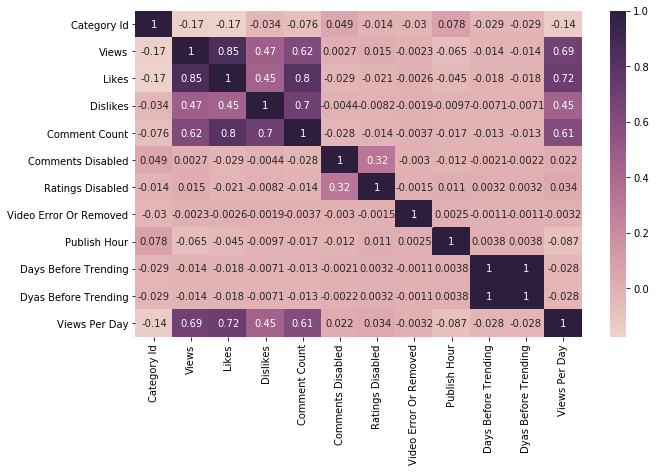

In [21]:
h_labels=[x.replace('_',' ').title() for x in list(us_videos.select_dtypes(include=['number','bool']).columns.values)]

fig, ax=plt.subplots(figsize=(10,6))
sns.heatmap(us_videos.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

### What do top 10 most trending videos look like? 

In [22]:
from IPython.display import HTML, display

# We choose the 10 most trending videos
selected_columns = ['title', 'channel_title', 'thumbnail_link', 'publish_date', 'category', 'views']

most_frequent = us_videos.groupby(selected_columns)['video_id'].agg(
    {"code_count": len}).sort_values(
    "code_count", ascending=False
).head(10).reset_index()

# Construction of HTML table with miniature photos assigned to the most popular movies
table_content = ''
max_title_length = 50

for date, row in most_frequent.T.iteritems():
    HTML_row = '<tr>'
    HTML_row += '<td><img src="' + str(row[2]) + '"style="width:100px;height:100px;"></td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[0]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[5]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Photo</th><th>Channel Name</th><th style="width:250px;">Title</th><th>Category</th><th>Publish Date</th></tr>Views<th><th>{}</table>'.format(table_content))
)

C:\Users\Zhimin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:

using a dict on a Series for aggregation
is deprecated and will be removed in a future version



### Most influential youtubers

In [29]:
max_title_length=30
number_of_youtubers=25

top_youtubers=us_videos.groupby(['channel_title'])['channel_title'].agg({'code_count': len}).sort_values('code_count', ascending=False).head(number_of_youtubers).reset_index()

trace1=go.Bar(
    y=[(x if len(x)<=max_title_length else x[:max_title_length]+
      '...') for x in top_youtubers.channel_title.values][::-1],
    x=top_youtubers['code_count'].tolist()[::-1],
    name='Top youtubers',
    orientation='h',
    marker=dict(
        color='rgba(55,128,191,0.7)',
        line=dict(
            color='rgba(55,128,191,1.0)',
            width=2,
        )
    ),
)

data=[trace1]

layout=go.Layout(
    title='Most influential youtubers',
    width=900,
    height=600,
    margin=go.Margin(
        l=180,
        r=50,
        b=80,
        t=80,
        pad=10
    ),
    paper_bgcolor='rgb(244,238,225)',
    plot_bgcolor='rgb(244,238,225)',
    yaxis=dict(
        anchor='x',
        rangemode='tozero',
        tickfont=dict(
            size=10
        ),
        ticklen=1
    ),
    xaxis=dict(
        title='Number of trending videos',
        anchor='x',
        rangemode='tozero'
    ),
    legend=dict(x=0.6, y=0.07)
)

fig=go.Figure(data=data, layout=layout)
py.iplot(fig)

C:\Users\Zhimin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

using a dict on a Series for aggregation
is deprecated and will be removed in a future version

C:\Users\Zhimin\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




### Most popular categories

In [24]:
max_title_length = 30
number_of_youtubers = 12

top_youtubers = us_videos.groupby(['category'])['category'].agg(
    {"code_count": len}).sort_values(
    "code_count", ascending=False
).head(number_of_youtubers).reset_index()

trace1 = go.Bar(
    y = [(x if len(x) <= max_title_length else x[:max_title_length] + "...") for x in top_youtubers.category.values][::-1],
    x = top_youtubers['code_count'].tolist()[::-1],
    name = "Top categories",
    orientation = 'h',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    ),
)

data = [trace1]

layout = go.Layout(
    title = 'Most popular categories',
    width=900,
    height=600,
    margin=go.Margin(
        l=180,
        r=50,
        b=80,
        t=80,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        anchor = 'x',
        rangemode='tozero',
        tickfont=dict(
            size=10
        ),
        ticklen=1
    ), 
    xaxis = dict(
        title= 'The number of trending videos',
        anchor = 'x',
        rangemode='tozero'
    ), 
    legend=dict(x=0.6, y=0.07)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

C:\Users\Zhimin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

using a dict on a Series for aggregation
is deprecated and will be removed in a future version

C:\Users\Zhimin\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




### Videos that took longest before trending

In [25]:
max_title_length=20
number_of_late_trending=15
us_videos_drop_duplicates['days_before_trending']=us_videos['days_before_trending'].astype(float)
late_trending=us_videos_drop_duplicates.sort_values(['days_before_trending'], ascending=False).head(number_of_late_trending)
late_trending_title=[(x if len(x)<=max_title_length else x[:max_title_length]+'...') for x in late_trending.title.values]
late_trending_days=late_trending.days_before_trending.values
late_trending_views=late_trending.views.values

trace1=go.Bar(
    x=late_trending_title,
    y=late_trending_days,
    name='Number of days',
    marker=dict(
        color='rgba(55,128,191,0.7)',
        line=dict(
            color='rgba(55,128,191,1.0)',
            width=2
        )
    )
)

trace2=go.Bar(
    x=late_trending_title,
    y=late_trending_views,
    name='Total views',
    marker=dict(
        color='rgba(219,64,82,0.7)',
        line=dict(
            color='rgba(219,64,82,1.0)',
            width=2
        )
    ),
    yaxis='y2'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title = 'Late trending',
    width=900,
    height=500,
    margin=go.Margin(
        l=75,
        r=75,
        b=120,
        t=80,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Number of days before trending',
        anchor = 'x',
        rangemode='tozero'
    ),   
    yaxis2=dict(
        title='Total number of views',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 61000
    ),
    #legend=dict(x=-.1, y=1.2)
    legend=dict(x=0.1, y=0.05)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

C:\Users\Zhimin\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




### Tags wordcloud

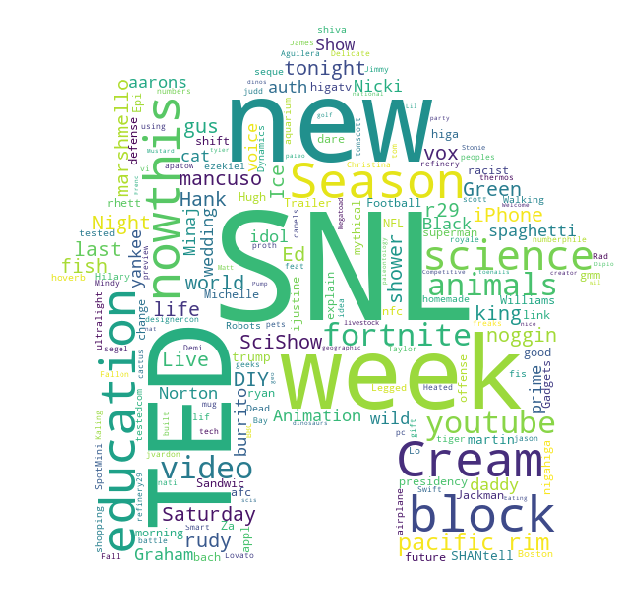

In [26]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
import matplotlib.pyplot as plt


mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask).generate(str(us_videos["tags"]))
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(mask)
